# MScFE 560 FINANCIAL MARKETS
## Group Work Project # 1
### Student Group 3793

**Irgibay Jemissov,**
**Boyan Davidov,**
**Ebenezer Yeboah**

## Portfolio C from Boyan Davidov

## STEP 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from pandas_datareader import data as pdr
import seaborn as sns

For Portfolio C we have chosen the following positions:
* Bying Xtrackers ShortDAX Daily ETF (XSDX.L)
* Buying iShares 1-3 Year Treasury Bond ETF (yahoo ticker: SHY)
* Buying Short Bitcoin Strategy ETF ((yahoo ticker: BITI)

We have short exposure to equities and bitcoin. Our long leg is U.S. treasuries.

For the analysis we take 1-year timeseries. We assume that we are retail investor and as such we are constrained when short-selling instruments. We prefer ETFs/ETNs as we can't buy/sell directly from stock exchanges, plus - we don't want to provide excessive cash as margin for derivatives.  

### Xtrackers ShortDAX Daily ETF

Xtrackers ShortDAX Daily ETF (XSDX.L) is inversely tracking the performance of large and mid-size German companies (like Siemens AG, Deutsche Telekom AG, SAP AG, major european car producers like BMW, Mercedes and Volkswagen as well as ). 

In [2]:
start = datetime(2022, 7, 24)
end = datetime(2023, 7, 24)

yf.pdr_override()
data_equityIndex = pdr.get_data_yahoo('XSDX.L', start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data_equityIndex.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-25,1316.000000,1316.000000,1316.000000,1315.500000,1315.500000,227
2022-07-26,1319.599976,1322.564941,1315.199951,1314.599976,1314.599976,3551
2022-07-27,1313.199951,1313.199951,1307.790039,1306.900024,1306.900024,1824


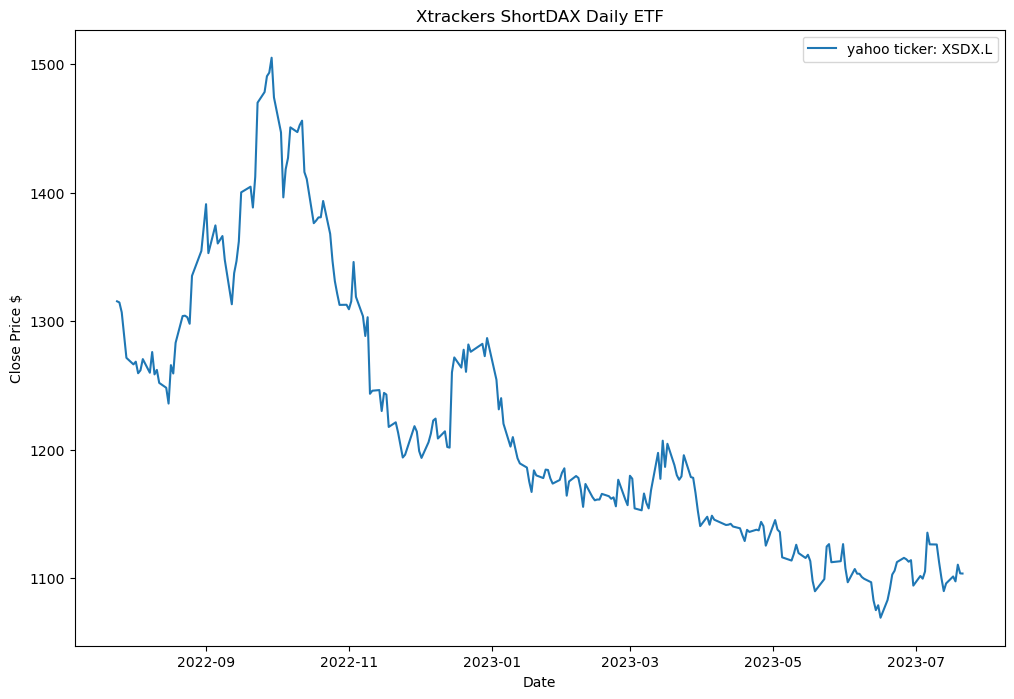

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(data_equityIndex.index, data_equityIndex['Close'], label='yahoo ticker: XSDX.L')
plt.xlabel('Date')
plt.ylabel('Close Price $')
plt.title('Xtrackers ShortDAX Daily ETF')
plt.legend()
plt.show()

DAX has bottomed in mid October 2022 and since then it has been trending up almost incessantly. Not surprinsigly the inverse tracker is trending down. Currently the index is trending in range and this level seems pivotal for further movements. Let's compute the first 4 moments of the returns distribution for the past year

In [5]:
#these can be computed much more efficiently using the libraries but I believe we should demonstrate we are acquinted with the 
#respective formulae
def compute_moments(time_series):
    # Compute returns using the formula: (current_Close - previous_Close) / previous_Close
    time_series['Return'] = ((time_series['Close'] - time_series['Close'].shift(1)) / time_series['Close'].shift(1))*100
    returns = time_series['Return'].dropna()
    
    #average return  
    mean_returns = np.mean(returns)
    
    # st.deviation
    st_deviation = np.sqrt(np.sum((returns - mean_returns)**2) / (len(returns) - 1))
    
    # skewness
    skewness = (np.sum((returns - mean_returns)**3) / len(returns)) / (st_deviation**3)
    
    #kurtosis
    kurtosis = (np.sum((returns - mean_returns)**4) / len(returns)) / (st_deviation**4) - 3
    
    return round(mean_returns,3), round(st_deviation, 3), round(skewness, 3), round(kurtosis, 3)

In [6]:
# Compute the reauired metrics
av_returns_equity, st_deviation_equity, skewness_equity, kurtosis_equity = compute_moments(data_equityIndex)

In [7]:
print("\033[1mAverage Return in %:\033[0m", av_returns_equity)
print("\033[1mStandard Deviation:\033[0m", st_deviation_equity)
print("\033[1mSkewness:\033[0m", skewness_equity)
print("\033[1mKurtosis:\033[0m", kurtosis_equity)

Average Return in %: -0.063
Standard Deviation: 1.201
Skewness: 0.266
Kurtosis: 1.752


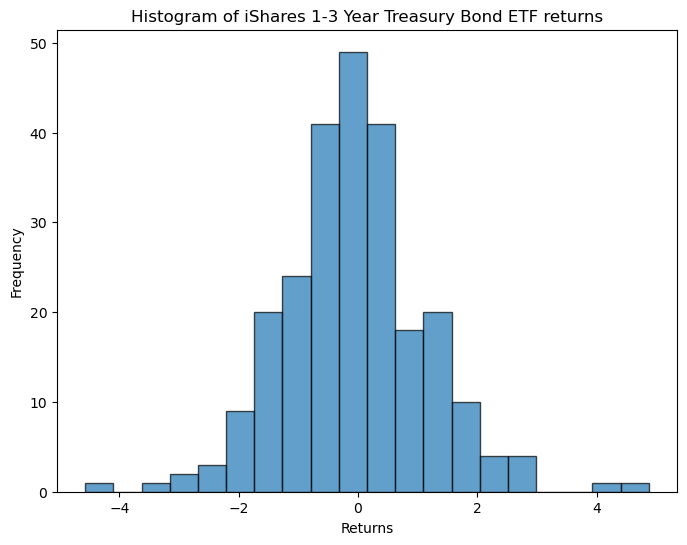

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(data_equityIndex['Return'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of iShares 1-3 Year Treasury Bond ETF returns')
plt.show()

The distribution looks normal, however, from the 3rd and 4th moment we can see that the returns were right skewed (skewness>0 implying assymetry) and  with thin tails (i.e. platykurtic since kurtosis < 3). These characteristics are extremely good for risky assets - they imply:
* **right skewness** - higher probability of substantial positive return rather than negative
* **thin tails** - less risk as extreme negative returns are less likely

However, the 1-year return is -18%

In [9]:
year_return_shortequity = np.log(data_equityIndex['Close'][-1]/data_equityIndex['Close'][0])

In [10]:
"{:.0%}".format(year_return_shortequity)

'-18%'

###  iShares 1-3 Year Treasury Bond ETF

iShares 1-3 Year Treasury Bond ETF (yahoo ticker: SHY) as the name suggests invests in short-term U.S. treasuries. We choose to invest in ETF as it offers better mixture to government bonds rather than buying single bond.  

In [11]:
start = datetime(2022, 7, 24)
end = datetime(2023, 7, 24)

yf.pdr_override()
data_bondETF = pdr.get_data_yahoo('SHY', start, end)

[*********************100%***********************]  1 of 1 completed


In [12]:
data_bondETF.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-25,82.790001,82.830002,82.769997,82.790001,80.912292,20449500
2022-07-26,82.870003,82.879997,82.750000,82.750000,80.873192,2854600
2022-07-27,82.769997,82.910004,82.730003,82.879997,81.000237,7051600


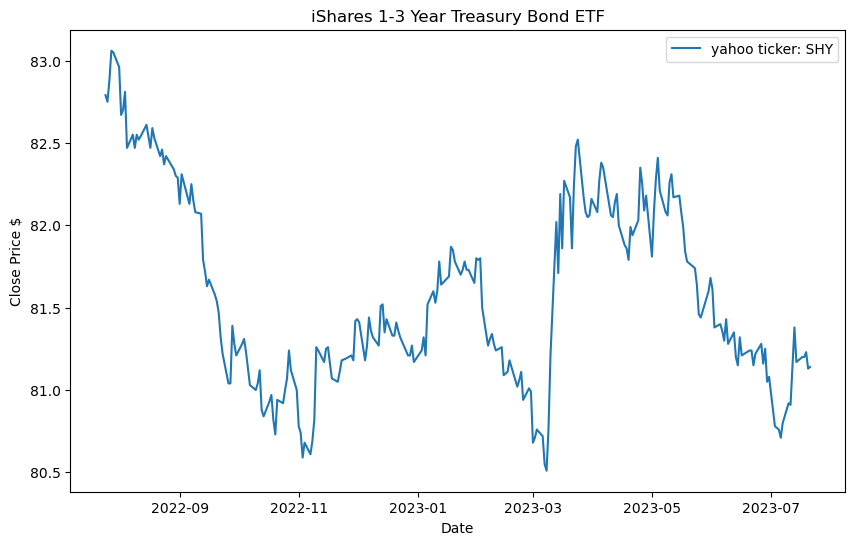

In [13]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(data_bondETF.index, data_bondETF['Close'], label='yahoo ticker: SHY')
plt.xlabel('Date')
plt.ylabel('Close Price $')
plt.title('iShares 1-3 Year Treasury Bond ETF')
plt.legend()
plt.show()

In [14]:
av_returns_bond, st_deviation_bond, skewness_bond, kurtosis_bond = compute_moments(data_bondETF)

In [15]:
print("\033[1mAverage Return in %:\033[0m", av_returns_bond)
print("\033[1mStandard Deviation:\033[0m", st_deviation_bond)
print("\033[1mSkewness:\033[0m", skewness_bond)
print("\033[1mKurtosis:\033[0m", kurtosis_bond)

Average Return in %: -0.008
Standard Deviation: 0.186
Skewness: 0.915
Kurtosis: 3.562


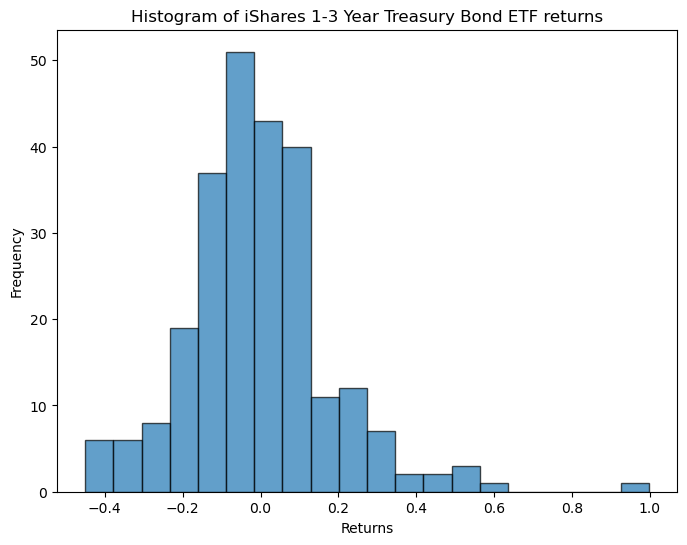

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(data_bondETF['Return'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of iShares 1-3 Year Treasury Bond ETF returns')
plt.show()

This is still assymetric and the kurtosis is slightly higher than 3, yet the closest to normal distribution from the instruments we chose for the portfolio. The one year return is -2%

In [17]:
year_return_bond = np.log(data_bondETF['Close'][-1]/data_bondETF['Close'][0])

In [18]:
"{:.0%}".format(year_return_bond)

'-2%'

### Short Bitcoin Strategy ETF

Short Bitcoin Strategy ETF (yahoo ticker: BITI doesn't mean we are shorting the ETF. In fact, it is inverse tracker of bitcoin, meaning we can buy the ETF and profit when bitcoin prices fall.

In [19]:
start = datetime(2022, 7, 24)
end = datetime(2023, 7, 24)

yf.pdr_override()
data_bitcoinETF = pdr.get_data_yahoo('BITI', start, end)

[*********************100%***********************]  1 of 1 completed


In [20]:
data_bitcoinETF.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-25,36.340000,36.910000,36.209999,36.470001,36.289776,633000
2022-07-26,38.040001,38.380001,37.810001,38.099998,37.911716,629800
2022-07-27,37.380001,37.389999,34.054001,34.529999,34.359360,648200


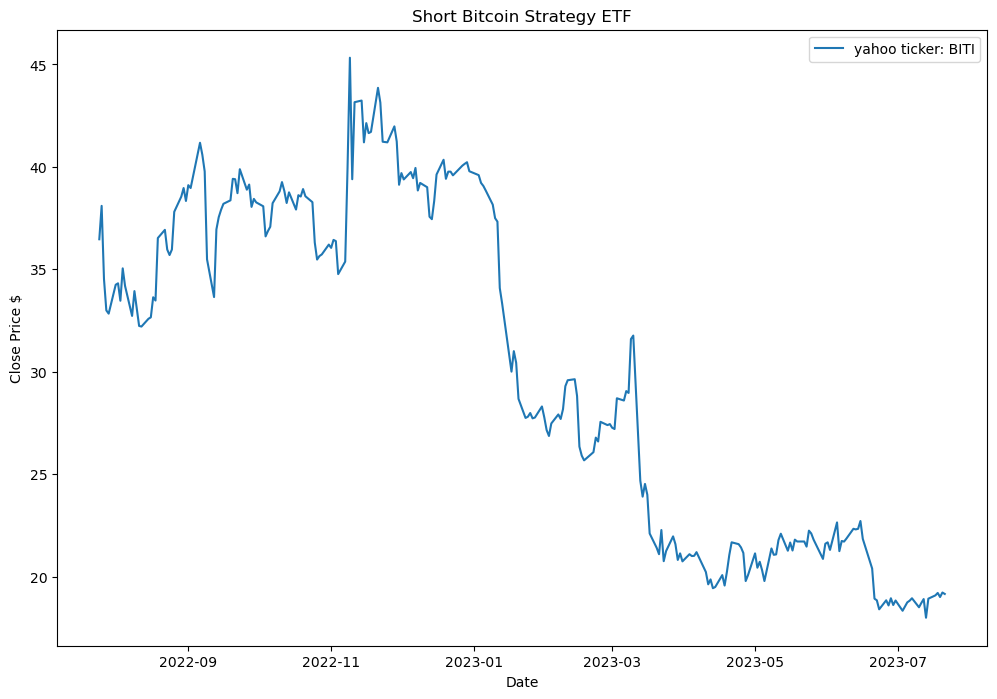

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(data_bitcoinETF.index, data_bitcoinETF['Close'], label='yahoo ticker: BITI')
plt.xlabel('Date')
plt.ylabel('Close Price $')
plt.title('Short Bitcoin Strategy ETF')
plt.legend()
plt.show()

In [22]:
av_returns_bitcoin, st_deviation_bitcoin, skewness_bitcoin, kurtosis_bitcoin = compute_moments(data_bitcoinETF)

In [23]:
print("Average Return:", av_returns_bitcoin)
print("Standard Deviation:", st_deviation_bitcoin)
print("Skewness:", skewness_bitcoin)
print("Kurtosis:", kurtosis_bitcoin)

Average Return: -0.188
Standard Deviation: 3.715
Skewness: -0.698
Kurtosis: 6.302


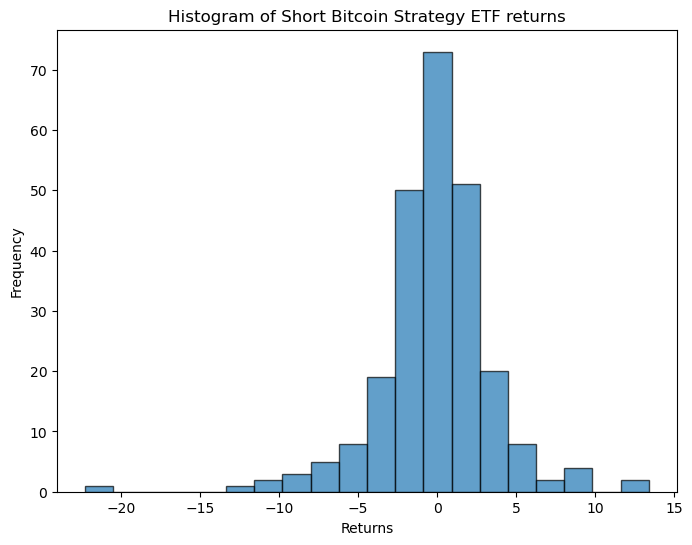

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(data_bitcoinETF['Return'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Short Bitcoin Strategy ETF returns')
plt.show()

This is exactly the opposite of the Equity ETF we started with - from the 3rd and 4th moment we can see that the returns were left skewed (skewness<0) and  with fat tails (i.e. leptokurtic since kurtosis > 3). These characteristics are not very promising - they imply:
* **left skewness** - higher probability of substantial negative return
* **fat tails** - more risk of extreme events (black swan)

It is not surprising given the one year return of **-64%**

In [25]:
year_return_bitcoin = np.log(data_bitcoinETF['Close'][-1]/data_bitcoinETF['Close'][0])

In [26]:
"{:.0%}".format(year_return_bitcoin)

'-64%'

## Step 2

### 1. Shorting
#### a. 

The portfolio can be sold short because ETFs are exchanged traded. The beauty of the the instruments we chose is that this is not needed because we can create short leg of equity index and bitcoin by just buying Short ETF that are inverse trackers of the performence of the underlying 

#### b. 

Assuming we want to sell short the bond ETF, we can borrow the ETF shares and sell them at the exchange where the ETF is traded. To close the position we buy back the shares and return them to the lending counterparty (usually the broker). 


### 2. Credit Risk

The portfolio has credit risk because the issuer of the ETFs can go bankrupt and default on its obligations. Also the underlying of the ETF can be carry credit risk - in the case of the treasuries ETF there is a risk of US defaulting or downgrade.  

### 3. Portfolio Statistics
#### a. 

We assume equally weighted portfolio of 3 instruments

In [27]:
(1/3)*year_return_shortequity+(1/3)*year_return_bond+(1/3)*year_return_bitcoin

-0.2798119319752159

**The portfolio lost 27% in one year!**

#### b. 

To commpute the variance we need the covariance between the three instruments.

In [28]:
weights = np.array([1/3,1/3,1/3])

In [29]:
portfolio_df = pd.DataFrame({
    'Equity ETF': data_equityIndex['Return'],
    'Bond ETF': data_bondETF['Return'],
    'Bitcoin ETF': data_bitcoinETF['Return']
})

portfolio_df = portfolio_df.dropna()

In [30]:
portfolio_df.head(3)

,Equity ETF,Bond ETF,Bitcoin ETF
Date,,,
2022-07-26,-0.068417,-0.048316,4.469419
2022-07-27,-0.585726,0.157096,-9.370078
2022-07-28,-1.331397,0.217182,-4.430926


In [31]:
st_dev_vector = [st_deviation_equity,st_deviation_bond,st_deviation_bitcoin]

In [32]:
st_dev_vector

[1.201, 0.186, 3.715]

In [33]:
stdev_mat = np.array([[1.201, 0, 0],
                      [0, 0.002, 0],
                      [0, 0, 3.715]])

In [34]:
def cov_mat(df):
    rows = len(df.axes[0])
    cols = len(df.axes[1])
    covariance = np.zeros((cols, cols))
    mean = np.mean(df, axis=0)
    for i in range(cols):
        for j in range(cols):
            covariance[i,j] += np.sum((df.iloc[:, i] - mean[i]) * (df.iloc[:, j] - mean[j]))

    return covariance/rows

In [35]:
cov_mat(portfolio_df)

array([[ 1.45020666, -0.01422521,  0.96826982],
       [-0.01422521,  0.03393729, -0.16961559],
       [ 0.96826982, -0.16961559, 13.57396742]])

Or easier with the library (there will be some rounding differences)

In [36]:
portfolio_df.cov()

,Equity ETF,Bond ETF,Bitcoin ETF
Equity ETF,1.456199,-0.014284,0.972271
Bond ETF,-0.014284,0.034078,-0.170316
Bitcoin ETF,0.972271,-0.170316,13.630058


In [37]:
def compute_portfolio_performance(ret_df, weights):
    portfolio_returns = (ret_df * weights).sum(axis=1)
    portfolio_variance = np.dot(weights.T, np.dot(ret_df.cov(), weights))
    
    return portfolio_returns, portfolio_variance

In [38]:
weights = np.array([1/3,1/3,1/3])

# Compute portfolio returns and standard deviation
portfolio_returns, portfolio_variance_ = compute_portfolio_performance(portfolio_df, weights)
portfolio_st_deviation = portfolio_variance_ ** 0.5
print("\033[1m1-year % Return:\033[0m", sum(portfolio_returns))
print("\033[1mPortfolio Variance:\033[0m", portfolio_variance_)
print("\033[1mPortfolio St.Deviation:\033[0m", portfolio_st_deviation)

1-year % Return: -25.654002915304716
Portfolio Variance: 1.8550750979907844
Portfolio St.Deviation: 1.362011416248331


### 4. Diversification
#### a. 

Diversification is when we combine several assets which are uncorrelated (or even negatively corrected) so that negative return of one the portfolio constituents is compensated by positive return of another constituent, i.e. risk is diminished because underperforming assets have less influence on the portfolio return. 

#### b. 
The portfolio we suggest here is well diversified despite the fact that combines two very risky ETFs (short equity and short bitcoin). This can be seen by plotting the correlations between the assets. The treasury (bond) ETF is negatively correlated to bitcoin and equity whereas the correlation between short equities ETF and bitcoin ETF is relatively low.  

Moreover we include 3 ETFs and each of them itself combines several underlyings (i.e. this is portfolio of portfolios)  

In [39]:
corr_matrix = portfolio_df.corr()

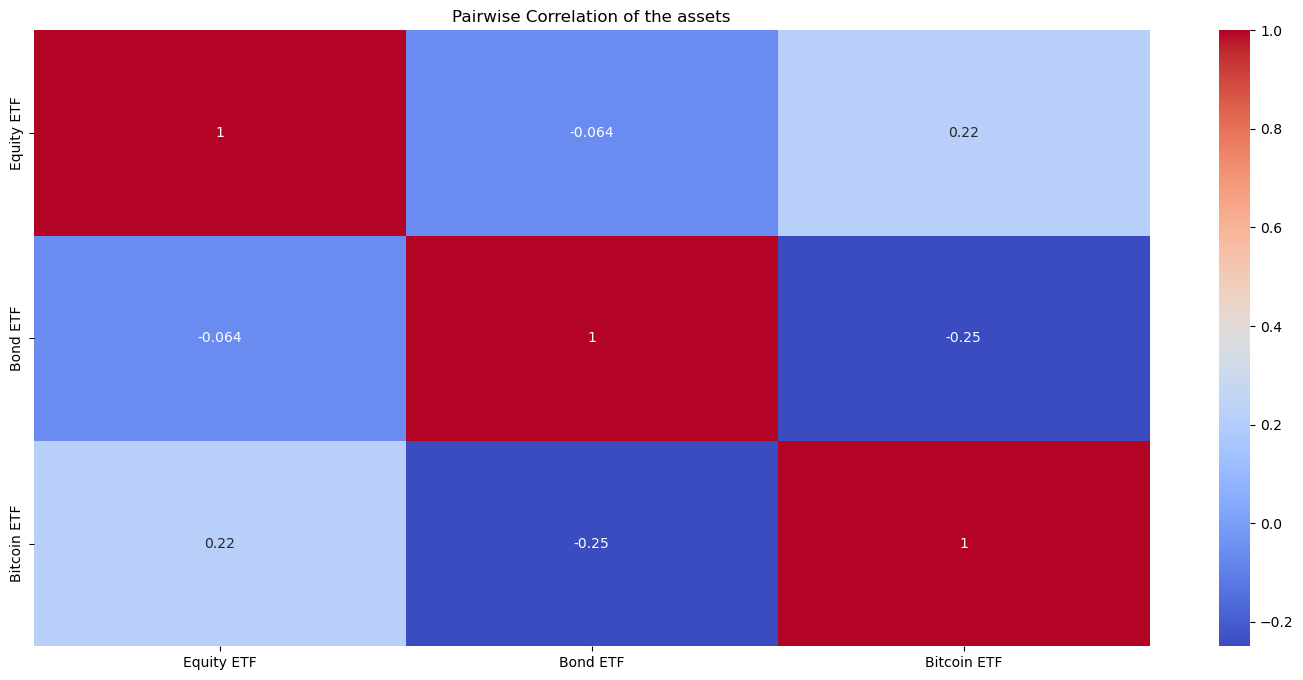

In [40]:
import seaborn as sns
plt.figure(figsize=(18, 8)) 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Pairwise Correlation of the assets')
plt.show()

### 5. Comparing Portfolios

| Portfolio | Return (%) | Volatility (%)|
|-----------|------------|---------------|
| A         |-26.48      | 3.2           |
| B         |2.48        | 0.47          |
| C         |-28         | 1.36          |

* a. Portfolio C has negative return over the 1-year holding period. Admittedly, it doesn't look very appealing. The main reason for the underperfomance is the spectacular rally of bitcoin since the beginning of 2023. With short bitcoin main driver of the performance it is similar to Portfolio A which is also short bitcoin.    
* b. However, it is less risky than A and for risk-free return of say 4%. Now we can observe something very interesting. Everybody knows that high Sharpe ratio is good. This is not always true for negative returns. Portfolio A has higher Sharpe ratio than C but for much higher volatility. Even though it is slightly less negative, I would prefer portfolio C.

In [41]:
#Sharpe ratio - portfolio C 
(-0.28-0.04)/1.36

-0.23529411764705882

In [42]:
#Sharpe ratio - portfolio A
(-0.26-0.04)/3.2

-0.09374999999999999

### 6. Assessing Risk
#### a. 
* One particular scenario in which this portfolio will underperform is if the central banks lose credibility. For instance, energy prices spike again due to supply issues (war in Ukraine induced sanctions on Russia, OPEC supply cuts) and higher energy prices bring more inflation. However, if the central banks around the world (and in particular Fed) decide to stimulate the economy (QE, interest rate cuts, government stimulus programs). This bullish scenario for both equities and bitcoin. FI assets would also profit from loose monetary policy, yet the effect would be likely less pronounced as short-term bonds are more suitable for risk-off scenario.  
* Soft landing or scenario where inflation goes back below 2% while economy doesn't fall into recession would send risk-on signal to the equity market. Bitcoin would also profit as it is considered risky asset and the biggest gains occured historically when risk appetite was high. 


#### b. 
Loose monetary policy or soft landing would affect also portfolio A (short bitcoin and long bond) though to lesser extent because it doesn't have exposure to equities.

### 7. Performance
#### a. 
* Risk-off scenario is perfect for our portfolio. First of all, equities and bitcoin will sell off. Secondly, in risk-off environment investors tend to buy short-term bonds (treasuries). Our portfolio will profit on each leg.  
* Government crackdown on bitcoin and bitcoin related companies/funds (Binance, Coinbase) will be negative for the crypto world. Our short bitcoin ETF will thrive in such ambience. Increase regulation towards bitcoin is another negative factor that will increase demand for Short Bitcoin Strategy ETF.  

#### b. 
Again, these scenarios are favorable for portfolio A because it has long bond and short bitcoin exposure

### 8. Disrupters
#### a. 

* Dovish central banks that discontinue monetary tightening - increasing the assets balance of Fed or rate cuts that can fuel liquidity and create more inflation in the economy. This can aggravate assets bubbles and our Short Equity ETF will be negatively affected. Furthermore, loose monetary policy will turn investors away from fiat currencies and will push them into buying bitcoin which would be negative for our short bitcoin ETF.
* More regulation from central banks towards crypto money will be beneficial for us because it will affect negatively bitcoin.


#### b. 
Potential influence from the investment banks can occur if they aggresively allocate to equities or increse their earnings outlook/GDP forecasts, which can term at least in short-term optimism about the economy. In addition, creating products with crypto related underlying can signal recognition by the 'smart money' and increse bitcoin prices. Again, this will mean negative returns of the Short bitcoin ETF in our portfolio.   

### 9. Re-assessing Risk
#### a. 
From the histogram below we can observe that short bitcoin ETF has left skew, whereas bond ETF and equity ETF have very slight right skew.   

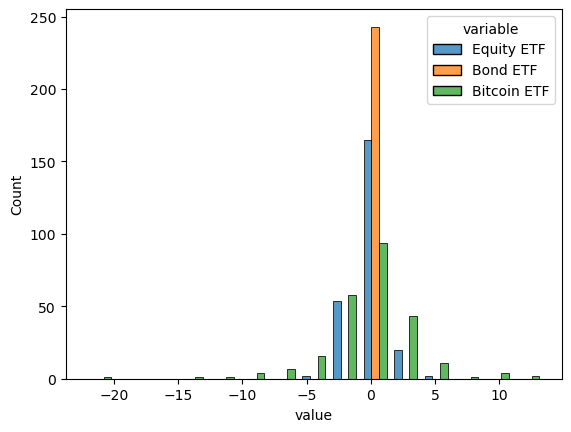

In [43]:
sns.histplot(portfolio_df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=0.75, bins=15);

#### b. 
From the plots below it seems that the three assets are uncorellated with the exception of bitcoin and equity appear to be slightly positively correlated. It is not clear whether any non-linear relationship exists.

<Axes: xlabel='Equity ETF', ylabel='Bond ETF'>

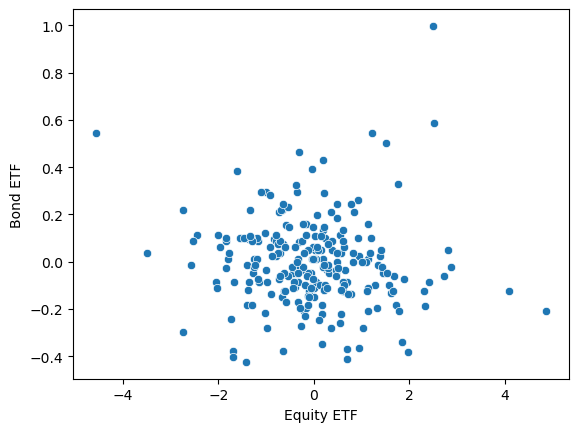

In [44]:
sns.scatterplot(x=portfolio_df['Equity ETF'],y=portfolio_df['Bond ETF'])    

<Axes: xlabel='Equity ETF', ylabel='Bitcoin ETF'>

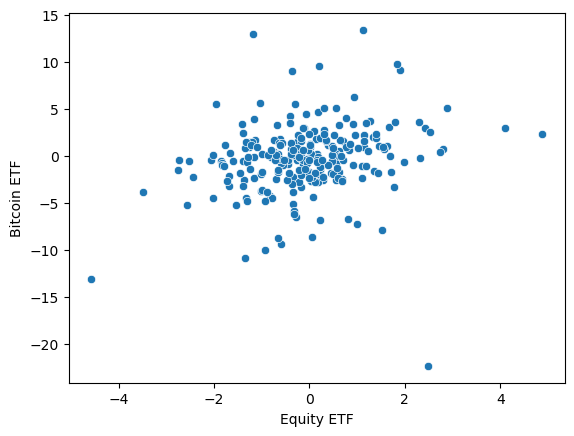

In [45]:
sns.scatterplot(x=portfolio_df['Equity ETF'],y=portfolio_df['Bitcoin ETF'])  

<Axes: xlabel='Bond ETF', ylabel='Bitcoin ETF'>

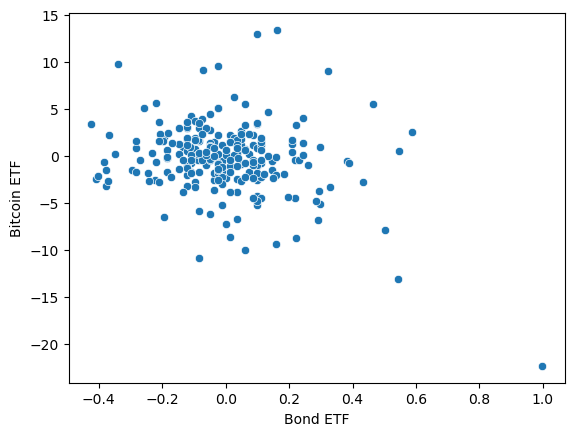

In [46]:
sns.scatterplot(x=portfolio_df['Bond ETF'],y=portfolio_df['Bitcoin ETF'])  

## Step 4

After careful consideration of all factors affecting the three portfolios and the observed returns and volatilites over 1-year long period we have unanimously concluded that the most robust portfolio is portfolio B.  

| Portfolio | Return (%) | Volatility (%) | Sharpe Ratio |
|-----------|------------|---------------|--------------|
| A         | -26.48     | 3.2           | -8.9         |
| B         | 2.48       | 0.47          | 1.02         |
| C         | -28.00     | 1.36          | -22.05       |

We have computed sharpe ratios for all portfolios and not surprisingly B is the best choice. Portfolio A and C have substantial drawdown due to the short leg in bitcoin. In general, over the last year it appears that shorting is too risky. We don't know whether this investor mindset of buying the dip will continue but in any case we don't want to speculate neither on mean reversion (equities and bitcoin correcting) nor on momentum (i.e. the rally to continue). Therefore we suggest portfolio B despite being less diversified (investing in one ETF and one single income stock). 

Overall, all team members were on the defensive side. This is why we all included some exposure to fixed income. More aggresive approach would be shorting equities and bitcoin in expectation of risk-off mode. This has not played out well during last months and timing reversal appears next to impossible. Nevertheless, we prefer to stay on the safe side rather than increase exposure to risky assets.  

We have chosen Deutsche telekom (DT) since it is the largest telecommunication company in Europe and delivers steady dividends with payout dividend ratio of 40-60% of EPS. Furthermore, the income is relatively secure, with the demand for internet, mobile phones, television and IT services being solid regardless of macro environment. Not only that, we expect the demand to increase with the widespread utilization of AI and data centers. DT is a large cap company and is one of the biggest by market cap in DAX (with large cap historically being safer especially during downturn in economy)

We have included in the portfolio also ETF of investment grade bonds. These bonds being often secured, more liquid and with high credit rating bear less risk during economic downturn. We prefer them also because some institutional investors might be prohibited from investing in high-yield bonds (which would reduce our investor target group). Investing in ETF is also additional diversifier as it includes several issuers.

This portfolio is not without risk. The biggest appears to be inflation spiking up again. This will require further interest rate hikes and with duration risk being high for fixed income, our portfolio will be negatively affected. DT is also very indebted company due to past acquisitions (like T-mobile in USA), hence with higher interest rates will also the payment of interest increase which would ultimately lower the profit of share.   

The portfolio targets rather conservative investors (eg. pension funds or insurers). It is certainly for risk-averse investors but at the same time seeking inflation hedge. It will likely provide better returns than money market funds or funds investing solely in government bonds. At the same time it is not exposed to bitcoin which can have extreme volatility. 

Last but not least, even if not dare short equities or bitcoin, we believe that risky assets will move at best sideways. Thus including high divident payout stock and invesment grade bond paying coupons is beyond question a good alternative in times of elevated geopolitical and macro risks. 


